# Final Analysis


Aggregate results.

Plots: accuracy vs shots, accuracy vs depth, runtime vs qubits.

Compare to classical baseline.

Write short interpretation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
sns.set(style="whitegrid", context="talk", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

c_lr_path = "../results/metrics/lr_results.csv"
c_svm_path = "../results/metrics/svm_results.csv"
q_lr_path = "../results/metrics/q_lr_sweep_results.csv"
q_svm_path = "../results/metrics/q_svm_sweep_results.csv"

c_lr_df = pd.read_csv(c_lr_path)
c_svm_df = pd.read_csv(c_svm_path)
q_lr_df = pd.read_csv(q_lr_path)
q_svm_df = pd.read_csv(q_svm_path)


display(c_lr_df.head())
display(c_svm_df.head()) 
display(q_lr_df.head())
display(q_svm_df.head()) 

,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,0,0,NaN,False,0.996217,0.008


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,0,0,NaN,False,0.996217,0.06


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,2,1,analytic,False,0.930024,210.69
1,2,1,1024,False,0.930024,201.61
2,2,2,analytic,False,0.930024,418.45
3,2,2,1024,False,0.930024,423.48
4,3,1,analytic,False,0.930024,5565.83


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,2,1,analytic,False,0.935697,210.70
1,2,1,1024,False,0.935697,201.61
2,2,2,analytic,False,0.935697,418.45
3,2,2,1024,False,0.935697,423.48
4,3,1,analytic,False,0.935697,5565.83


### Aggregate Quantum Results

In [7]:
q_lr_agg = q_lr_df.groupby(["n_qubits", "depth", "shots", "noise"]).agg({
    "accuracy":["mean", "std"], 
    "runtime_sec": "mean"}).reset_index()

q_svm_agg = q_svm_df.groupby(["n_qubits", "depth", "shots", "noise"]).agg({
    "accuracy":["mean", "std"], 
    "runtime_sec": "mean"}).reset_index()

q_lr_agg.columns = ["n_qubits", "depth", "shots", "noise", "acc_mean", "acc_std", "runtime_sec"]
q_svm_agg.columns = ["n_qubits", "depth", "shots", "noise", "acc_mean", "acc_std", "runtime_sec"]

display(q_lr_agg)
display(q_svm_agg)

,n_qubits,depth,shots,noise,acc_mean,acc_std,runtime_sec
0,2,1,1024,False,0.930024,NaN,201.61
1,2,1,analytic,False,0.930024,NaN,210.69
2,2,2,1024,False,0.930024,NaN,423.48
3,2,2,analytic,False,0.930024,NaN,418.45
4,3,1,1024,False,0.930024,NaN,399.16
5,3,1,analytic,False,0.930024,NaN,5565.83
6,3,2,1024,False,0.930024,NaN,388.57
7,3,2,analytic,False,0.930024,NaN,345.97
8,4,1,1024,False,0.930024,NaN,429.49
9,4,1,analytic,False,0.930024,NaN,403.72


,n_qubits,depth,shots,noise,acc_mean,acc_std,runtime_sec
0,2,1,1024,False,0.935697,NaN,201.61
1,2,1,analytic,False,0.935697,NaN,210.70
2,2,2,1024,False,0.935697,NaN,423.48
3,2,2,analytic,False,0.935697,NaN,418.45
4,3,1,1024,False,0.935697,NaN,399.16
5,3,1,analytic,False,0.935697,NaN,5565.83
6,3,2,1024,False,0.935697,NaN,388.57
7,3,2,analytic,False,0.935697,NaN,345.97
8,4,1,1024,False,0.935697,NaN,429.49
9,4,1,analytic,False,0.935697,NaN,403.72


### Classical v Quantum Comparison

In [8]:
c_lr_acc = c_lr_df["accuracy"].mean()
c_svm_acc = c_svm_df["accuracy"].mean()

c_lr_std = c_lr_df["accuracy"].std()
c_svm_std = c_svm_df["accuracy"].std()

print(f"Classical Log reg accuracy (avg): {c_lr_acc:.3f} ± {c_lr_std:.3f}")
print(f"Classical SVM accuracy (avg): {c_svm_acc:.3f} ± {c_svm_std:.3f}")

q_lr_agg["improvement_over_classical"] = q_lr_agg["acc_mean"] - c_lr_acc
q_svm_agg["improvement_over_classical"] = q_svm_agg["acc_mean"] - c_svm_acc


Classical Log reg accuracy (avg): 0.996 ± nan
Classical SVM accuracy (avg): 0.996 ± nan


### Visualizations

#### Logistic Regression

**Accuracy vs Circuit Depth**

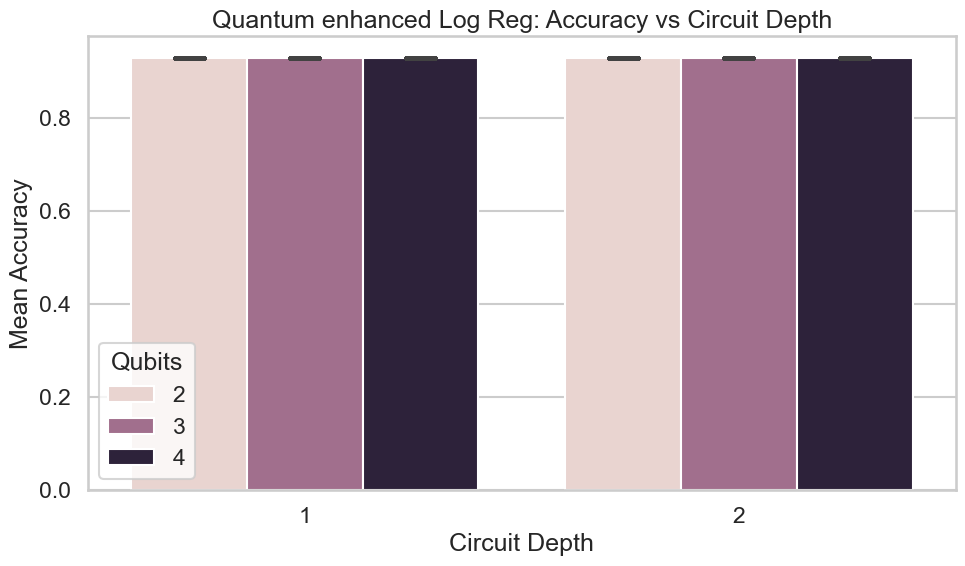

In [9]:
plt.figure()
sns.barplot(   
    data=q_lr_agg, 
    x="depth", y="acc_mean", hue="n_qubits",
    errorbar="sd", 
    capsize=0.2  
)   

plt.title("Quantum enhanced Log Reg: Accuracy vs Circuit Depth")  
plt.ylabel("Mean Accuracy")
plt.xlabel("Circuit Depth")  
plt.legend(title="Qubits")  
plt.tight_layout()
plt.show(); 

**Accuracy vs Shots**

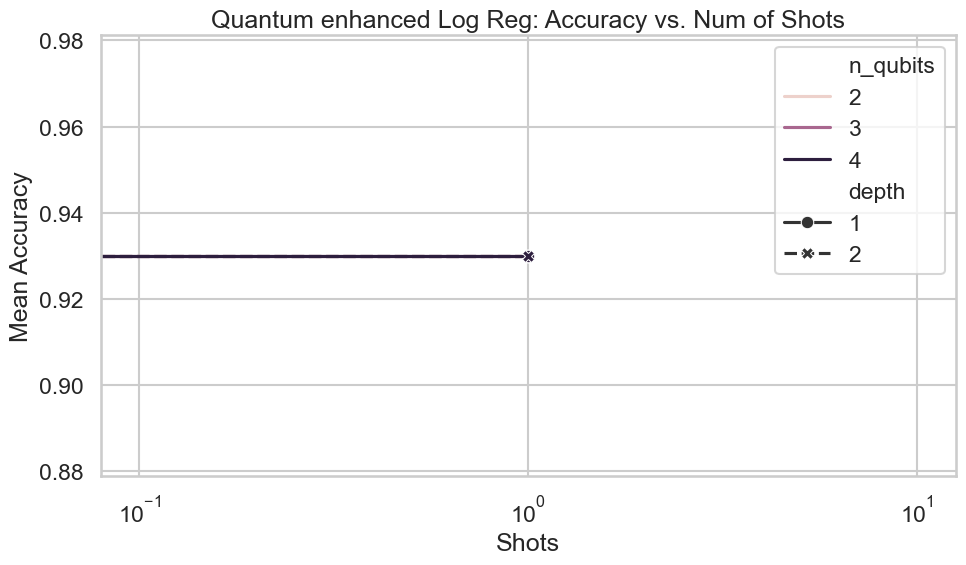

In [10]:
plt.figure()  
sns.lineplot(
    data=q_lr_agg, 
    x="shots", y="acc_mean", hue="n_qubits", style="depth", markers=True
)   


plt.title("Quantum enhanced Log Reg: Accuracy vs. Num of Shots")  
plt.ylabel("Mean Accuracy") 
plt.xlabel("Shots")         
plt.xscale("log")
plt.tight_layout()  
plt.show()   

**Runtime vs Qubits**

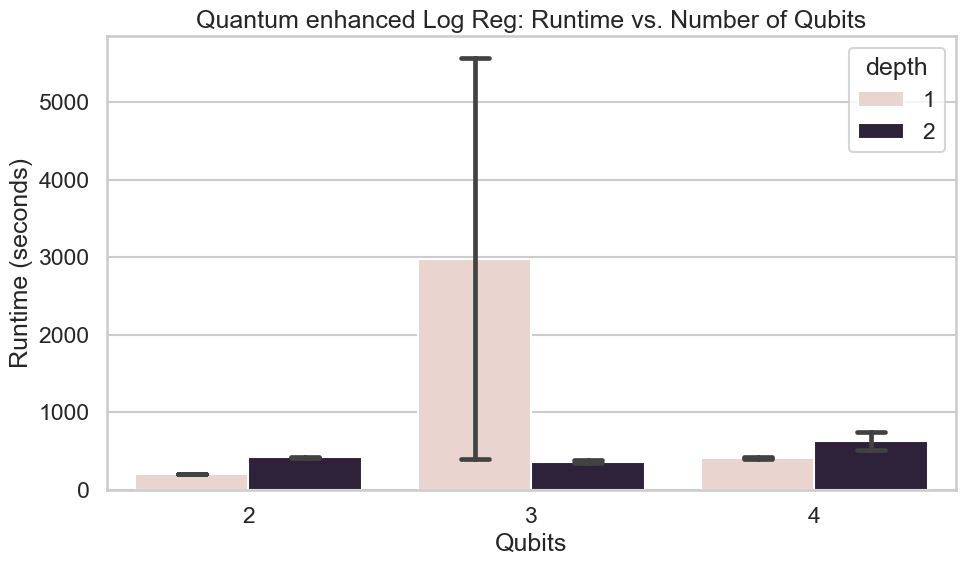

In [11]:
plt.figure()
sns.barplot(
    data=q_lr_agg, 
    x="n_qubits", y="runtime_sec", hue="depth",
    capsize=0.2 
)   


plt.title("Quantum enhanced Log Reg: Runtime vs. Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Qubits")  
plt.tight_layout()
plt.show();   

**Improvement over classical**

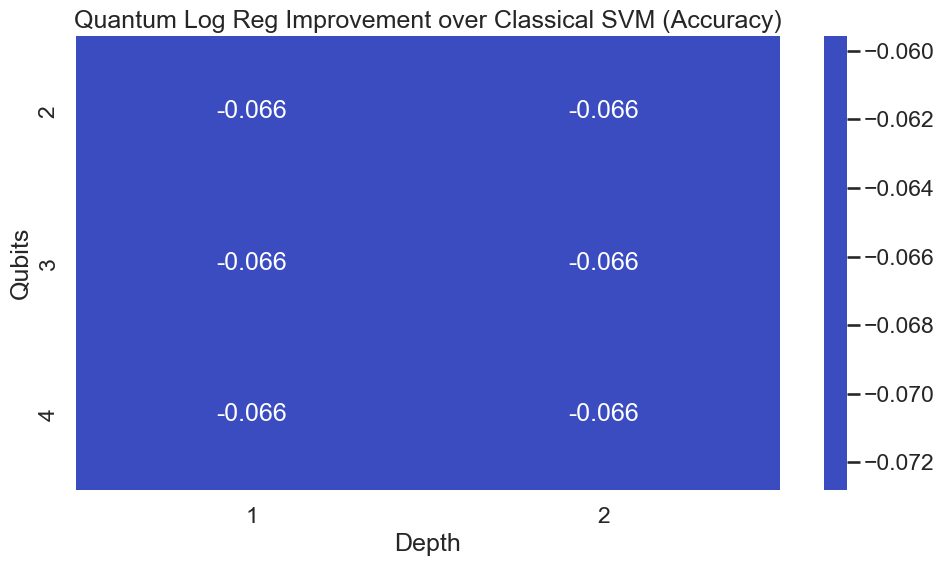

In [12]:
plt.figure()
sns.heatmap(
    q_lr_agg.pivot_table(index="n_qubits", columns="depth", values="improvement_over_classical"),
    annot=True, cmap="coolwarm", center= 0  
)  

plt.title("Quantum Log Reg Improvement over Classical SVM (Accuracy)")
plt.ylabel("Qubits")
plt.xlabel("Depth")
plt.tight_layout()  
plt.show(); 

#### SVM

**Accuracy vs Circuit Depth**

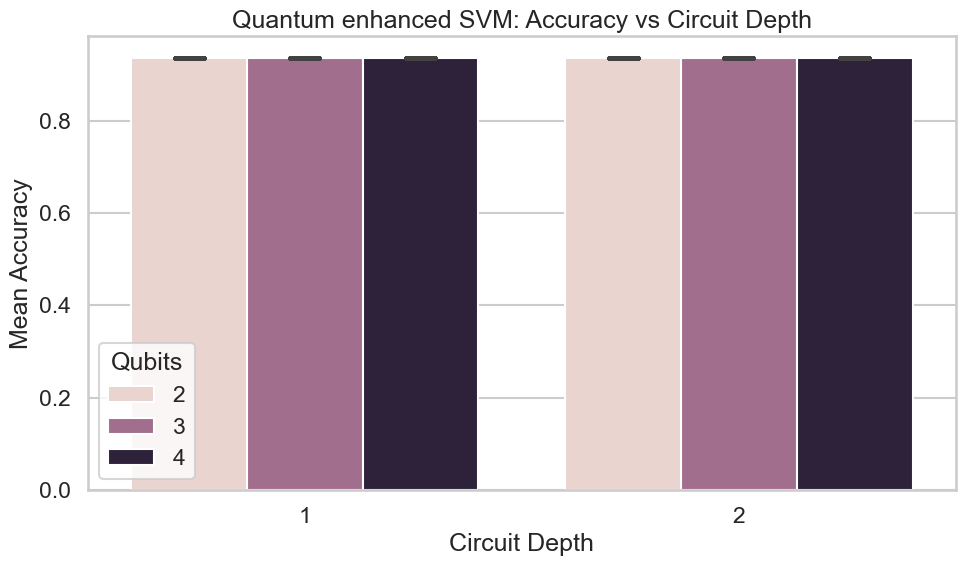

In [13]:
plt.figure()
sns.barplot(   
    data=q_svm_agg, 
    x="depth", y="acc_mean", hue="n_qubits",
    errorbar="sd", 
    capsize=0.2    
)   

plt.title("Quantum enhanced SVM: Accuracy vs Circuit Depth")  
plt.ylabel("Mean Accuracy")
plt.xlabel("Circuit Depth")  
plt.legend(title="Qubits")     
plt.tight_layout()
plt.show(); 

**Accuracy vs Shots**

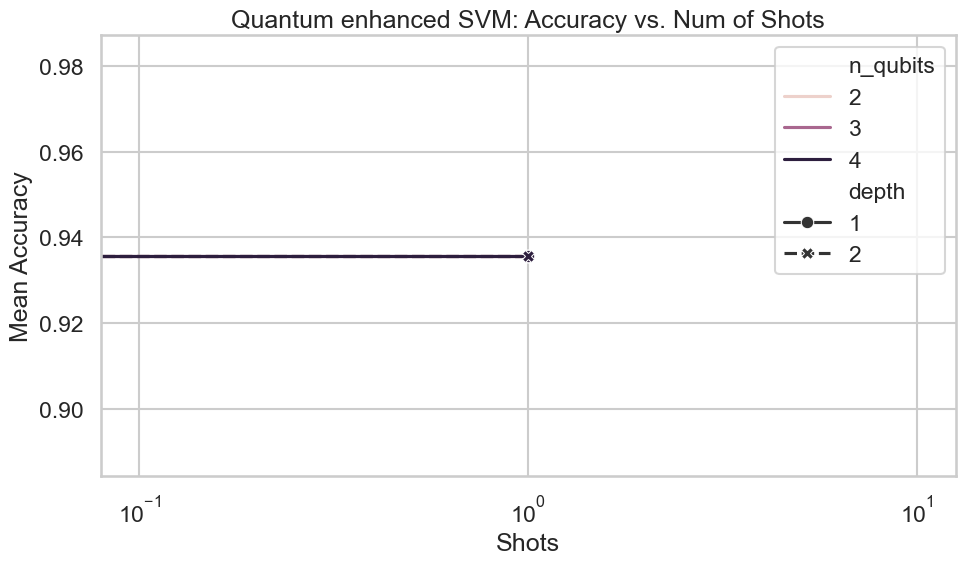

In [14]:
plt.figure()  
sns.lineplot(
    data=q_svm_agg, 
    x="shots", y="acc_mean", hue="n_qubits", style="depth", markers=True
)  


plt.title("Quantum enhanced SVM: Accuracy vs. Num of Shots")  
plt.ylabel("Mean Accuracy") 
plt.xlabel("Shots")         
plt.xscale("log")
plt.tight_layout()  
plt.show()   

**Runtime vs Qubits**

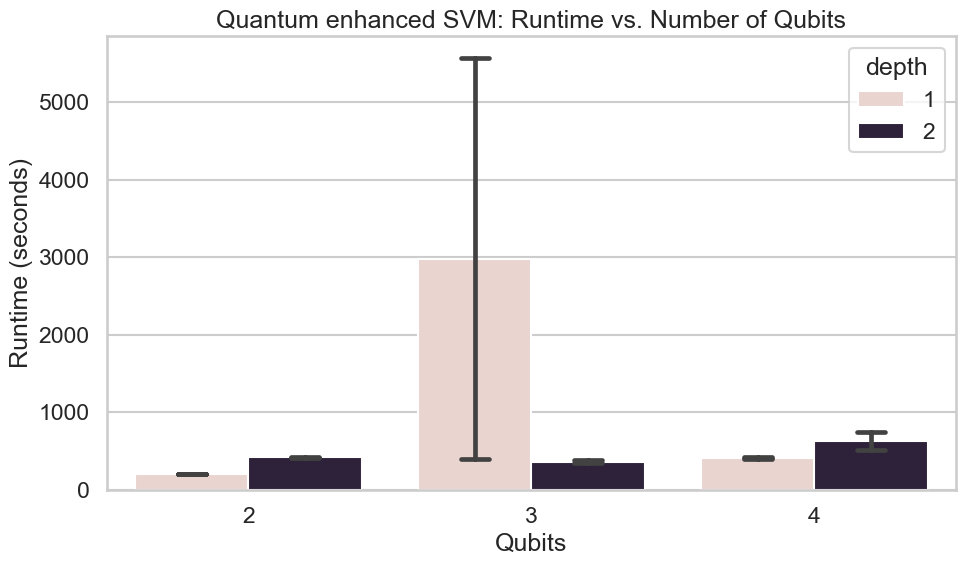

In [15]:
plt.figure()
sns.barplot(
    data=q_svm_agg, 
    x="n_qubits", y="runtime_sec", hue="depth",
    capsize=0.2 
)   


plt.title("Quantum enhanced SVM: Runtime vs. Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Qubits")  
plt.tight_layout()
plt.show();   

**Improvement over classical**

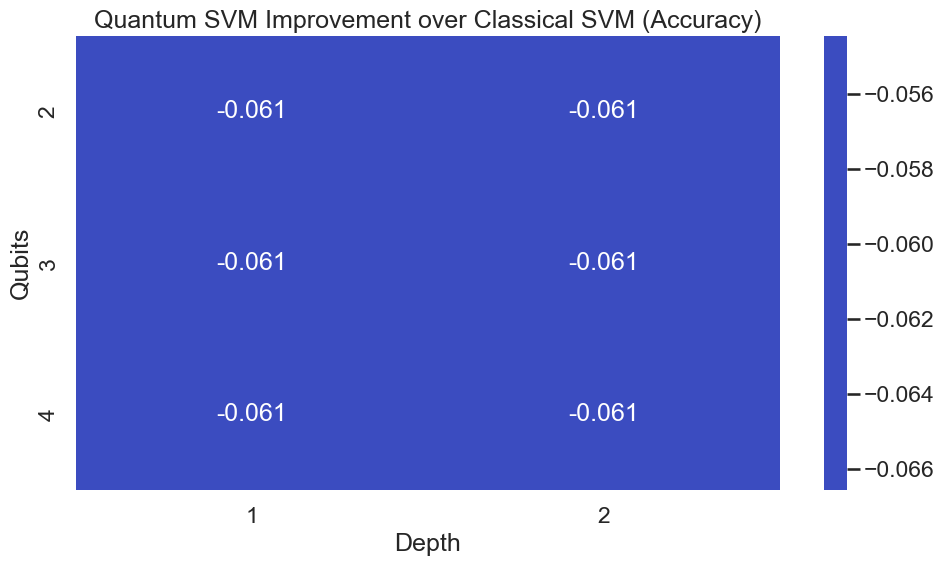

In [16]:
plt.figure()
sns.heatmap(
    q_svm_agg.pivot_table(index="n_qubits", columns="depth", values="improvement_over_classical"),
    annot=True, cmap="coolwarm", center= 0  
)  

plt.title("Quantum SVM Improvement over Classical SVM (Accuracy)")
plt.ylabel("Qubits")
plt.xlabel("Depth")
plt.tight_layout() 
plt.show(); 

### Save Summary

In [21]:
summary_path = "../results/metrics/quantum_summary.csv"
q_lr_agg.to_csv("../results/metrics/final/q_lr_summary.csv", index=False)
q_svm_agg.to_csv("../results/metrics/final/q_svm_summary.csv", index=False)